In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read patient data
patient_info = pd.read_csv('../res/patient_inputs.csv')
num_patient = patient_info.shape[0]
print(f"there are {patient_info.shape[0]} patients in the dataset")
patient_info.head()

there are 142 patients in the dataset


,sample-id,score,group,Faecalibacterium prausnitzii,Phocaeicola vulgatus,Prevotella copri,Bacteroides uniformis,[Eubacterium] rectale,Phocaeicola dorei,Bacteroides acidifaciens/caecimuris/koreensis/kribbi/ovatus/xylanisolvens,...,Comamonas jiangduensis/kerstersii/terrae,Enterocloster aldenensis,Faecalicatena orotica/Lachnobacterium bovis,Acutalibacter muris/Neglectibacter timonensis/Ruminococcoides bili/Ruminococcus bromii,Hungatella hathewayi/Frisingicoccus caecimuris/Hungatella effluvii,Bacteroides caccae/Bacteroides intestinalis/Alloprevotella rava,Ruthenibacterium lactatiformans/Fournierella massiliensis,Stenotrophomonas geniculata/maltophilia/pavanii,Tepidibaculum saccharolyticum/Ruminococcus albus,Sellimonas intestinalis/Drancourtella massiliensis
0,ERR1072712,0.9280,DEVIANT,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ERR1072713,0.9463,DEVIANT,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,ERR1072867,0.9386,DEVIANT,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ERR1073228,0.8924,DEVIANT,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ERR1073693,0.9317,DEVIANT,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# read nutriomics data
nutriomics_info = pd.read_csv('../res/nims.csv')
num_nutrition, num_microbe = nutriomics_info.shape
print(f"there are {nutriomics_info.shape[0]} nutriomics and {nutriomics_info.shape[1]} microbes in the dataset")
nutriomics_info.head()

there are 92 nutriomics and 401 microbes in the dataset


,nutrients,Faecalibacterium prausnitzii,Phocaeicola vulgatus,Prevotella copri,Bacteroides uniformis,[Eubacterium] rectale,Phocaeicola dorei,Bacteroides acidifaciens/caecimuris/koreensis/kribbi/ovatus/xylanisolvens,Akkermansia muciniphila,Bacteroides stercoris,...,Comamonas jiangduensis/kerstersii/terrae,Enterocloster aldenensis,Faecalicatena orotica/Lachnobacterium bovis,Acutalibacter muris/Neglectibacter timonensis/Ruminococcoides bili/Ruminococcus bromii,Hungatella hathewayi/Frisingicoccus caecimuris/Hungatella effluvii,Bacteroides caccae/Bacteroides intestinalis/Alloprevotella rava,Ruthenibacterium lactatiformans/Fournierella massiliensis,Stenotrophomonas geniculata/maltophilia/pavanii,Tepidibaculum saccharolyticum/Ruminococcus albus,Sellimonas intestinalis/Drancourtella massiliensis
0,Thr_D,0.0000,0.8911,0.0,1.0,0.0,1.0,1.0000,1.0,0.6667,...,0.0,1.0,0.0,0.0,0.250,1.0,0.2,1.0,0.0,1.0
1,Trp_D,0.0000,0.0000,0.0,1.0,0.0,0.0,0.9295,1.0,0.6667,...,1.0,1.0,0.0,0.0,0.125,0.0,0.0,1.0,0.0,0.0
2,His_D,0.0623,0.8911,0.0,1.0,0.0,1.0,0.9295,0.0,0.6667,...,1.0,0.0,0.0,0.0,0.250,1.0,0.0,1.0,0.0,0.0
3,Pro_D,0.0000,0.8911,0.0,0.0,0.0,1.0,0.0000,1.0,0.0000,...,1.0,0.0,0.0,0.0,0.000,0.0,0.0,1.0,0.0,0.0
4,Met_D,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,...,0.0,0.0,0.0,0.5,0.000,0.0,0.0,0.0,0.0,0.0


### 1. Data preprocessing for comparison experiments

In [5]:
def data_processing():
	# study the influence of number of nutrients
	for num_choice in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
		nut_index = np.arange(num_nutrition)
		nutrient_choice = np.sort(np.random.choice(nut_index, num_choice))
		new_nutriomics_info = nutriomics_info.iloc[nutrient_choice, :]
		new_nutriomics_info.to_csv(f'../res/diff_num_nutrients/nims_{num_choice}.csv', index=False)

	# study the influence of number of microbes
	for num_choice in range(50, num_microbe, 50):
		microbe_index = np.arange(1, num_microbe)
		microbe_choice = np.sort(np.random.choice(microbe_index, num_choice))
		new_nutriomics_info = nutriomics_info.iloc[:, microbe_choice]
		new_nutriomics_info.to_csv(f'../res/diff_num_microbes/nims_{num_choice}.csv', index=False)
		new_patient_info = patient_info.iloc[:, microbe_choice+2]
		new_patient_info.iloc[:10, :].to_csv(f'../res/diff_num_microbes/patient_inputs_{num_choice}.csv', index=False)

# data_processing()

### 2. Results on model comparison

In [11]:
result_path = './comparison/p10_k3/'
bruteforce_result = pd.read_csv(result_path + 'bruteforce.csv')
# bruteforce_result = bruteforce_result.score.values
bruteforce_result

,sample-id,score,Thr_D,Trp_D,His_D,Pro_D,Met_D,Lys_D,Trp,His,...,B2,B3,B5,B6,B7,B9,B12,Q,Lipoate,K
0,ERR1072712,524.394,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ERR1072713,523.823,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ERR1072867,529.974,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ERR1073228,420.887,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ERR1073693,502.896,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,ERR2092071,431.608,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,ERR2092311,529.427,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139,ERR2092419,468.407,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,ERR2092435,499.005,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
bruteforce_result.iloc[:, 2:].sum(axis=0).sort_values()

Thr_D       0
ManNAc      0
MurNac      0
(Fuc)n      0
Gnt         0
         ... 
Mannan     30
Ara        65
Lac        67
Mel        73
FruAsp    106
Length: 92, dtype: int64

In [26]:
greedy_result = pd.read_csv(result_path + '3_1_1_1.csv')
# greedy_result = greedy_result.score.values
greedy_result.iloc[:, 2:].sum(axis=0).sort_values()

Thr_D       0
ManNAc      0
FruLys      0
MurNac      0
(Fuc)n      0
         ... 
GlcLys     25
Mel        37
Ara        55
Lac       112
FruAsp    123
Length: 92, dtype: int64

In [27]:
greedy_result.score.mean()

495.7397887323943

In [35]:
our_result = pd.read_csv(result_path + '3_2_10_10.csv')
# our_result = our_result.score.values
# our_result.mean()
print(our_result.iloc[:, 2:].sum(axis=0).sort_values())
our_result = our_result.score.values
our_result.mean()

Thr_D       0
ManNAc      0
MurNac      0
(Fuc)n      0
Gnt         0
         ... 
Mannan     29
Ara        66
Lac        67
Mel        73
FruAsp    107
Length: 92, dtype: int64


493.15763380281686

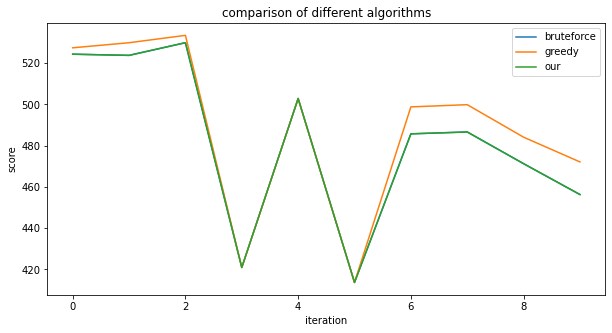

In [10]:
fig = plt.figure(figsize=(10, 5))
plt.plot(bruteforce_result, label='bruteforce')
plt.plot(greedy_result, label='greedy')
plt.plot(our_result, label='our')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('score')
plt.title('comparison of different algorithms')
plt.show()

In [38]:
results = pd.read_csv('./comparison/p10_k3/comp_d3_allp.csv')
print(results.style.to_latex())

\begin{tabular}{llrrlrlrlrlr}
 & Algorithm & runtime & mean_score & N1 & R1 & N2 & R2 & N3 & R3 & N4 & R4 \\
0 & bruteforce & 6.957746 & 493.150000 & FruAsp & 106 & Mel & 73 & Lac & 67 & Ara & 65 \\
1 & greedy & 0.014085 & 495.740000 & FruAsp & 123 & Lac & 112 & Ara & 55 & Mel & 37 \\
2 & Ours & 2.457746 & 493.160000 & FruAsp & 107 & Mel & 73 & Lac & 67 & Ara & 66 \\
\end{tabular}



### 3. Results on hyperparameter choosing

In [80]:
result = pd.read_csv("./hyperparameter/runtime_p10.csv", header=None, usecols=[1, 2, 3, 4])
result.columns = ['d', 'l', 'v', 'runtime']
result

,d,l,v,runtime
0,1,1,1,1.0
1,1,1,3,0.0
2,1,1,4,1.0
3,1,1,6,0.0
4,1,1,7,1.0
...,...,...,...,...
121,3,10,4,95.0
122,3,10,6,115.0
123,3,10,7,134.0
124,3,10,9,179.0


In [81]:
scores = []
for d in [1, 2, 3]:
	for l in [1, 3, 5, 7, 9, 10]:
		for v in [1, 3, 4, 6, 7, 9, 10]:
			result_path = f'./hyperparameter/10_patients/10_{d}_{l}_{v}.csv'
			tmp = pd.read_csv(result_path)
			scores.append(tmp.score.mean())
result['relevant_score'] = [x - scores[0] for x in scores]
result.sort_values(by='relevant_score', ascending=False)

,d,l,v,runtime,relevant_score
0,1,1,1,1.0,0.000
28,1,9,1,0.0,0.000
42,2,1,1,0.0,0.000
43,2,1,3,1.0,0.000
44,2,1,4,1.0,0.000
...,...,...,...,...,...
95,3,3,7,13.0,-15.651
125,3,10,10,183.0,-15.651
111,3,7,10,89.0,-19.701
104,3,5,10,47.0,-19.701


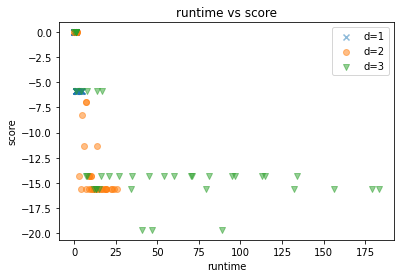

In [83]:
markers = ['x', 'o', 'v']
# result['marker'] = [markers[d-1] for d in result.d]

fig = plt.figure()
for d in [1, 2, 3]:
	tmp = result[result.d == d]
	plt.scatter(tmp.runtime, tmp.relevant_score, marker=markers[d-1], alpha=0.5, label=f'd={d}')
# plt.scatter(result.runtime, result.score)
plt.xlabel('runtime')
plt.ylabel('score')
plt.title('runtime vs score')
plt.legend()
plt.show()

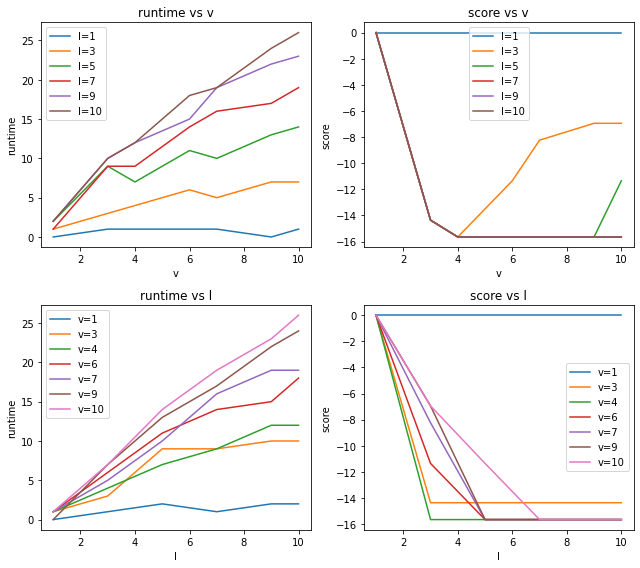

In [103]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

tmp = result[result.d == 2]

v = [1, 3, 4, 6, 7, 9, 10]
axs[0, 0].set_title('runtime vs v')
for l in [1, 3, 5, 7, 9, 10]:
    axs[0, 0].plot(v, tmp[tmp.l == l].runtime, label=f'l={l}')
axs[0, 0].set_xlabel('v')
axs[0, 0].set_ylabel('runtime')
# axs[0, 0].set_yscale('log')
# axs[0, 0].set_xscale('log')
axs[0, 0].legend()

for l in [1, 3, 5, 7, 9, 10]:
    axs[0, 1].plot(v, tmp[tmp.l == l].relevant_score, label=f'l={l}')
axs[0, 1].set_xlabel('v')
axs[0, 1].set_ylabel('score')
axs[0, 1].set_title('score vs v')
axs[0, 1].legend()

l = [1, 3, 5, 7, 9, 10]
for v in [1, 3, 4, 6, 7, 9, 10]:
    axs[1, 0].plot(l, tmp[tmp.v == v].runtime, label=f'v={v}')
axs[1, 0].set_xlabel('l')
axs[1, 0].set_ylabel('runtime')
axs[1, 0].set_title('runtime vs l')
# axs[1, 0].set_yscale('log')
# axs[1, 0].set_xscale('log')
axs[1, 0].legend()

for v in [1, 3, 4, 6, 7, 9, 10]:
    axs[1, 1].plot(l, tmp[tmp.v == v].relevant_score, label=f'v={v}')
axs[1, 1].set_xlabel('l')
axs[1, 1].set_ylabel('score')
axs[1, 1].set_title('score vs l')
axs[1, 1].legend()

plt.tight_layout()
plt.show()